Nama : Ferli Malkan Amien <br>
NPM  : 2117051050 <br>
Kelas: C <br>
Link : https://colab.research.google.com/drive/1O1Onxa17kxTueoy9PCNOZRo07y03nsus?usp=sharing

# Pertemuan 7

## Library

In [1]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

## Load Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/rahmantaufik27/dataset/main/study/student_score_pass.csv")
df.head()

,npm,activeness_score,assignment_score,pre_test_score,post_test_score,midterm_test_score,end_semester_test_score,pass_test
0,2022041101,99,71.0,93.0,52.0,44.0,24,not pass
1,2022041102,96,77.0,NaN,27.0,100.0,89,pass
2,2022041103,86,71.0,84.0,17.0,21.0,41,not pass
3,2022041104,81,96.0,NaN,NaN,11.0,99,not pass
4,2022041105,93,85.0,68.0,29.0,44.0,50,not pass


## Exploratory Data Analisis (EDA)
Cek analisis data menggunakan statistika dan visualisasi

In [4]:
# informasi dataframe (jumlah data, jumlah kolom, jumlah baris, tipe data, dll)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   npm                      372 non-null    int64  
 1   activeness_score         372 non-null    int64  
 2   assignment_score         364 non-null    float64
 3   pre_test_score           336 non-null    float64
 4   post_test_score          363 non-null    float64
 5   midterm_test_score       361 non-null    float64
 6   end_semester_test_score  372 non-null    int64  
 7   pass_test                372 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 23.4+ KB


In [5]:
# jumlah NaN / missing values setiap column
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        npm  activeness_score  assignment_score  pre_test_score  \
0    False             False             False           False   
1    False             False             False            True   
2    False             False             False           False   
3    False             False             False            True   
4    False             False             False           False   
..     ...               ...               ...             ...   
367  False             False              True           False   
368  False             False             False           False   
369  False             False             False           False   
370  False             False             False           False   
371  False             False             False           False   

     post_test_score  midterm_test_score  end_semester_test_score  pass_test  
0              False               False                    False 

In [6]:
# informasi statistik dataframe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
npm,372.0,2.022041e+09,107.531391,2.022041e+09,2.022041e+09,2.022041e+09,2.022041e+09,2.022041e+09
activeness_score,372.0,9.275806e+01,44.578778,-9.600000e+01,8.500000e+01,9.000000e+01,9.500000e+01,6.660000e+02
assignment_score,364.0,8.532967e+01,8.626380,7.000000e+01,7.900000e+01,8.500000e+01,9.200000e+01,1.000000e+02
pre_test_score,336.0,5.798810e+01,26.472625,1.000000e+01,3.500000e+01,6.150000e+01,8.100000e+01,1.000000e+02
post_test_score,363.0,5.279890e+01,25.691020,1.000000e+01,3.200000e+01,5.100000e+01,7.400000e+01,1.000000e+02
midterm_test_score,361.0,5.339889e+01,24.968789,1.000000e+01,3.200000e+01,5.300000e+01,7.300000e+01,1.000000e+02
end_semester_test_score,372.0,5.333065e+01,30.695107,-9.700000e+01,3.100000e+01,5.250000e+01,7.900000e+01,1.000000e+02


<Axes: >

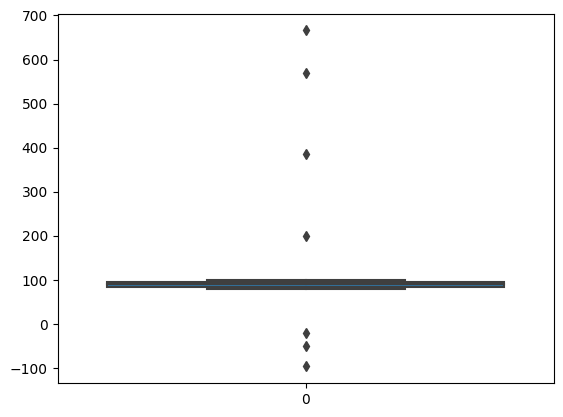

In [7]:
# cek outlier data
sns.boxplot(df['activeness_score'])

## Preprocessing

In [8]:
# hapus data outlier
df.loc[df["activeness_score"] < 0, "activeness_score"] = np.nan
df.loc[df["activeness_score"] > 100, "activeness_score"] = np.nan

In [9]:
# assign missing values dengan muean untuk setiap column yang ada missing nya
df["activeness_score"].fillna(value=df["activeness_score"].mean(), inplace=True)
df["assignment_score"].fillna(value=df["assignment_score"].mean(), inplace=True)
df["pre_test_score"].fillna(value=df["pre_test_score"].mean(), inplace=True)
df["post_test_score"].fillna(value=df["post_test_score"].mean(), inplace=True)
df["midterm_test_score"].fillna(value=df["midterm_test_score"].mean(), inplace=True)

In [10]:
# hapus kolom yang tidak diperlukan
df_clean = df.drop(['npm', 'pass_test'], axis=1)

In [11]:
# rescale data-nya
data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(df_clean)

## Modeling
Modeling/Training data menggunakan algoritma hierarchical clustering

2.0101833242492018


<function matplotlib.pyplot.show(close=None, block=None)>

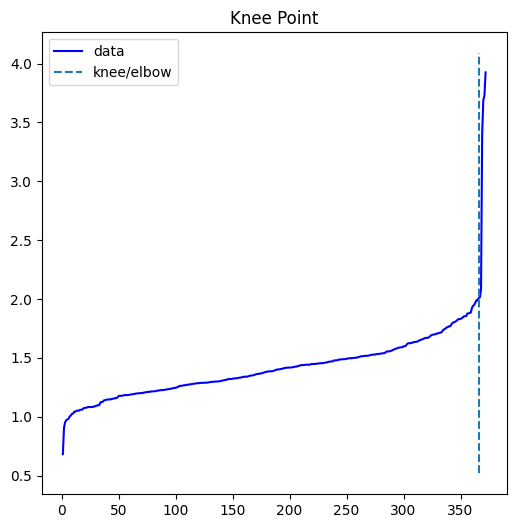

In [12]:
# mencari rentang nilai disetiap tetangga
nbrs = NearestNeighbors().fit(scaled_data)
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_data)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

# plot datanya
k_dist = sort_neigh_dist[:, 4]
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, curve = "concave", direction = "increasing", online=True)

# mencari nilai epsilon yang didapat dari knee poin
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show

In [13]:
clusters = DBSCAN(eps = 2, min_samples = 4).fit(scaled_data)
label = clusters.labels_
np.unique(label)

array([-1,  0])

## Visualisasi

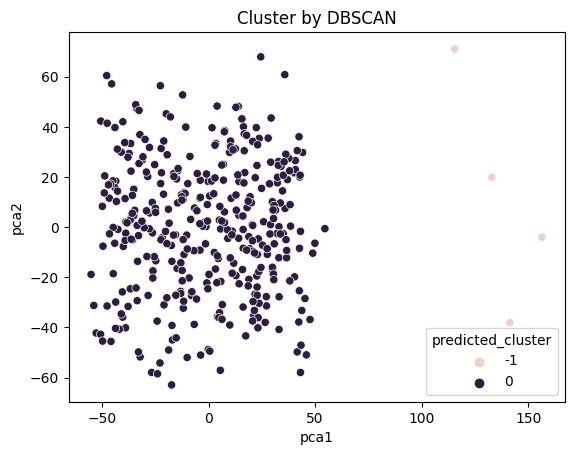

In [14]:
df["predicted_cluster"] = label

# df_clean = df.drop(["npm", "pass_test"], axis=1)
reduced_data = PCA(n_components=2).fit_transform(df_clean)
df_reduced_data = pd.DataFrame(reduced_data, columns=["pca1", "pca2"])
sns.scatterplot(x = "pca1", y = "pca2", hue = df["predicted_cluster"], data = df_reduced_data)
plt.title("Cluster by DBSCAN")
plt.show()

*Hanya 2 Clusters yang terbentu (0, -1), secara visualisasi cluster terpisah antara yang titik data yang dekat dengan titik data yang jauh / outlier

** untuk data ini, penggunaan DBSCAN lebih valid dibandingkan cluster berdasarkan hirarki

## Evaluasi

In [15]:
ss = silhouette_score(df_clean, label)
print(f"Akurasi berdasarkan Silhouette score adalah: {ss}")

Akurasi berdasarkan Silhouette score adalah: 0.5382877116109005
